# yTub23C-GFP and yTub37C-GFP PP4KO
- This code generates the plots in Figure 2C and 2E.
- The measurements were done in Imaris and recorded/calculated in excel.
- Experiments were done on two different microscopes: the Nikon 3i microscope, and the Andor BC43 benchtop confocal.
    - The data from these two microscopes are plotted seperately to determine that they did not interfere with one another.
    - The data shown in figure 2C is the combined data from these two micrioscopes.  
- Data was visualized using `seaborn` plots.
- There is a summary statistical test table at the end of the notebook. 

In [1]:
# Loading in standard libraries and functions

### --- REMOVE PRINT FUNCTION: --- ### 

# Makes it so any variable or statement on it's own line gets printed w/o print()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### --- IMPORT LIBRARIES: --- ###

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
#import altair as alt
import os
import glob
import matplotlib.patches as mpatches
# We're also going to tell Jupyter to use inline plotting instead of notebook plotting
# It basically means you don't have to use plt.show() in every cell
%matplotlib inline
import re

### --- CONJ 510 SUMMARY TABLES: --- ### 

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

#summary = fil.groupby('condition').agg(['mean', 'std', 'min', 'max', 'median', percentile(25), percentile(75), 'skew'])
#summary

### --- IMPORT SCIPY T TEST: --- ###

from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

### --- IND. T-TEST FUNCTION: --- ###
# source: https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

### --- 3D CARTESIAN DISTANCE FUNCTION: --- ###

# AB = sqrt((x2 - x1)^2  +   (y2 - y1)^2   +   (z2 - z1)^2)

def cart3D_dist(x1, x2, y1, y2, z1, z2):
    x_dif = x2-x1
    y_dif = y2-y1
    z_dif = z2-z1
    x_sqr = x_dif**2
    y_sqr = y_dif**2
    z_sqr = z_dif**2
    dist = sqrt(x_sqr + y_sqr + z_sqr)
    return dist

### --- FINDING UNIQUE COMBINATIONS FUNCTION: --- ###

# Based on the mathematical concept of finding unique combinations without selecting the same option again. 
# n is the dataset to be pulled from
# r is the number of data to select from the dataset 
def find_combos(n, r):
    return (math.factorial(n))/((math.factorial(r))*(math.factorial(n-r)))

### --- ANGLE BETWEEN TWO 2D LINES FUNCTION: --- ###

import math

# defining function for calculating angle of rotation between 2 2D lines
def find_angle(m1, m2): 
    angle = math.degrees(math.atan(abs((m1 - m2)/(1 + m1*m2))))
    return angle

### --- SLOPE BETWEEN TWO POINTS ON A 2D LINE FUNCTION: --- ###

# defining a function to calculate slope

def find_slope(y2, y1, x2, x1):
    m = (y2 - y1)/(x2 - x1)
    return m

### --- SET UP FOR A FIGURE: --- ###

# fig1, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(ncols = 2,
#                                                         nrows = 3,
#                                                         sharex = False,
#                                                         sharey = True,
#                                                         figsize = (40,50))

#titlefont = 40 # sets font size 
#axisfont = 30
#plt.rc('xtick', labelsize=25) 
#plt.rc('ytick', labelsize=25) 
#palette = ['#5DADE2', '#EC7063', '#F8C471']
#fig_title = 'ACD Timing in WT and pp4KO neuroblasts'


### --- SET UP FOR CUSTOM LEGENDS --- ###

#colors = ["g", "w"]
#texts = ["Green Data Description", "RedData Description"]
#patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
#plt.legend(handles=patches, bbox_to_anchor=(0.5, 0.5), loc='center', ncol=2 )


### --- color palettes --- ###

# p = ['#3386FF', '#FF5733'] # classic blue and orange from the rotation saga
# ['#3386FF', '#143566', 'grey'] # hex codes for blue, dark blue, grey
# ['#FF5733', '#99341e', 'grey'] # hex codes for orange, dark orange, grey
# ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000'] #blue, purple, magenta, orange, and yellow palette for color blindness

### --- PLOT STYLES: --- ###

plt.style.use('fast') # uses seaborn style
#sns.set_style('white') # uses blank white background style (to copy PRISM)

### --- REMOVING DATAFRAME VIEW LIMITS --- ###
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Command line cells to ensure code is in right directory. 

In [2]:
pwd

'/Users/rcsegura/Desktop/PP4_github/Figure2'

In [3]:
ls

FIG2.ipynb      Fig2 data.xlsx  readme.md


In [4]:
home_dir = '/Users/rcsegura/Desktop/PP4_github/Figure2' # home directory
#figs_dir = home_dir + '/figs/' # directory to hold the figure output
#data_dir = home_dir + '/data/' # directory holding the data
#outs_dir = home_dir + '/output/' # directory to save any output csv files to 

# Fig 2C

In [5]:
# reading in new data
os.chdir(home_dir)
data = pd.read_excel('Fig2 data.xlsx', sheet_name = 'Fig 2C')
data.head(5)

,file name,microscope,genotype,"spot size (X,Y,Z)",phase,raw AC GFP,subtracted AC GFP,AC/Cyto GFP
0,"RCS PP4KO x yTub23CGFP, ChJup female overview_...",BC43,WT,"1,1,2",interphase,156.937,56.937,3.795800
1,"RCS PP4KO x yTub23CGFP, ChJup female overview_...",BC43,WT,"1,1,2",interphase,175.265,75.265,5.017667
2,"RCS PP4KO x yTub23CGFP, ChJup female overview_...",BC43,WT,"1,1,2",interphase,157.013,57.013,3.800867
3,"RCS PP4KO x yTub23CGFP, ChJup female overview_...",BC43,WT,"1,1,2",interphase,196.205,96.205,6.413667
4,"RCS PP4KO x yTub23CGFP, ChJup female overview_...",BC43,WT,"1,1,2",interphase,166.664,66.664,4.444267


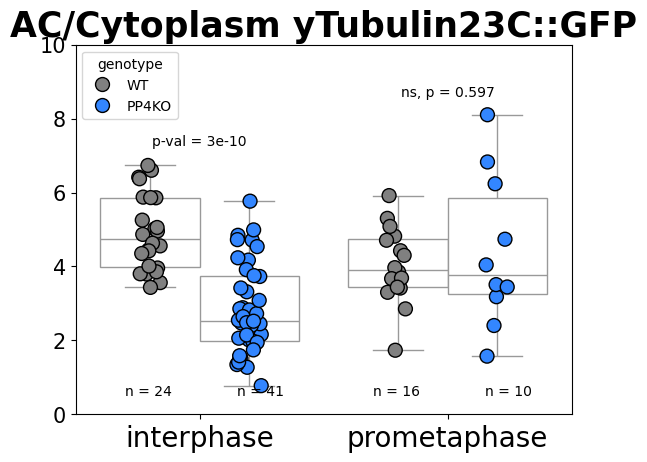

In [6]:
# plotting
p = ['grey', '#3386FF']
hue_order = ['WT', 'PP4KO']
order = ['interphase', 'prometaphase']
y_value = 'AC/Cyto GFP'
point_size = 10

plot_title = 'Interphase AC/Cytoplasm yTubulin23C::GFP'


sns.stripplot(x = 'phase', y = y_value, data = data, hue = 'genotype', 
             hue_order = hue_order, order = order,
             palette = p, size = point_size, edgecolor = 'k', linewidth = 1,
             dodge = True)

sns.boxplot(x = 'phase', y = y_value, data = data, hue = 'genotype', 
             hue_order = hue_order, order = order,
             palette = ['w','w'], dodge = True, legend = False)

# adding stats
for i in range(0, len(order)):
    phase = order[i]
    x_pos = i

    param1 = data[(data['genotype']=='WT') & (data['phase'] == phase)][y_value].dropna()
    param2 = data[(data['genotype']=='PP4KO') & (data['phase'] == phase)][y_value].dropna()
    p_value = independent_ttest(param1, param2, 0.05)[3]
    
    if p_value < 0.001:
        p_annot = f"p-val = {np.round(p_value, decimals = 10)}"
        plt.annotate(p_annot, xy = (x_pos, param2.max()+1.5), ha = 'center')
        plt.annotate(f"n = {len(param1)}", xy = (x_pos-0.3, 0.5))
        plt.annotate(f"n = {len(param2)}", xy = (x_pos+0.15, 0.5))
    elif p_value < 0.01:
        p_annot = '**'
        plt.annotate(p_annot, xy = (x_pos, param2.max()+0.5), ha = 'center', size = 20)
        plt.annotate(f"n = {len(param1)}", xy = (x_pos-0.3, 0.5))
        plt.annotate(f"n = {len(param2)}", xy = (x_pos+0.15, 0.5))
    elif p_value < 0.05:
        p_annot = '*'
        plt.annotate(p_annot, xy = (x_pos, param2.max()+0.5), ha = 'center', size = 20)
        plt.annotate(f"n = {len(param1)}", xy = (x_pos-0.3, 0.5))
        plt.annotate(f"n = {len(param2)}", xy = (x_pos+0.15, 0.5))
    elif p_value > 0.05:
        p_annot = f"ns, p = {np.round(p_value, decimals = 3)}"
        plt.annotate(p_annot, xy = (x_pos, param2.max()+0.5), ha = 'center')
        plt.annotate(f"n = {len(param1)}", xy = (x_pos-0.3, 0.5))
        plt.annotate(f"n = {len(param2)}", xy = (x_pos+0.15, 0.5))

plt.xticks(size = 20)
plt.yticks(size = 15)
plt.ylim(0,10)
plt.title(plot_title, fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('')
plt.title('AC/Cytoplasm yTubulin23C::GFP', fontsize = 25, fontweight = 'bold')

#os.chdir(figs_dir)

#plt.savefig('yTub23CGFP_new size.png', dpi = 900, bbox_inches = 'tight')
#plt.savefig('yTub23CGFP_new size.svg', dpi = 900, bbox_inches = 'tight')
plt.show();

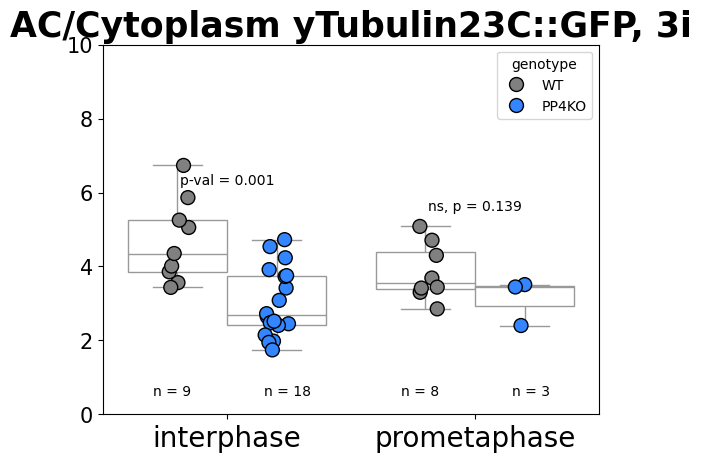

In [7]:
# plotting only 3i data
p = ['grey', '#3386FF']
hue_order = ['WT', 'PP4KO']
order = ['interphase', 'prometaphase']
y_value = 'AC/Cyto GFP'
point_size = 10

plot_title = 'AC/Cytoplasm yTubulin23C::GFP, 3i'


sns.stripplot(x = 'phase', y = y_value, data = data[data['microscope']=='3i'], hue = 'genotype', 
             hue_order = hue_order, order = order,
             palette = p, size = point_size, edgecolor = 'k', linewidth = 1,
             dodge = True)

sns.boxplot(x = 'phase', y = y_value, data = data[data['microscope']=='3i'], hue = 'genotype', 
             hue_order = hue_order, order = order,
             palette = ['w','w'], dodge = True, legend = False)

# adding stats
for i in range(0, len(order)):
    phase = order[i]
    x_pos = i

    param1 = data[(data['genotype']=='WT') & (data['phase'] == phase)]
    param1 = param1[param1['microscope']=='3i'][y_value]
    #param1
    param2 = data[(data['genotype']=='PP4KO') & (data['phase'] == phase)]
    param2 = param2[param2['microscope']=='3i'][y_value]
    #param2
    p_value = independent_ttest(param1, param2, 0.05)[3]
    
    if p_value < 0.001:
        p_annot = f"p-val = {np.round(p_value, decimals = 3)}"
        plt.annotate(p_annot, xy = (x_pos, param2.max()+1.5), ha = 'center')
        plt.annotate(f"n = {len(param1)}", xy = (x_pos-0.3, 0.5))
        plt.annotate(f"n = {len(param2)}", xy = (x_pos+0.15, 0.5))
    elif p_value < 0.01:
        p_annot = '**'
        plt.annotate(p_annot, xy = (x_pos, param2.max()+0.5), ha = 'center', size = 20)
        plt.annotate(f"n = {len(param1)}", xy = (x_pos-0.3, 0.5))
        plt.annotate(f"n = {len(param2)}", xy = (x_pos+0.15, 0.5))
    elif p_value < 0.05:
        p_annot = '*'
        plt.annotate(p_annot, xy = (x_pos, param2.max()+0.5), ha = 'center', size = 20)
        plt.annotate(f"n = {len(param1)}", xy = (x_pos-0.3, 0.5))
        plt.annotate(f"n = {len(param2)}", xy = (x_pos+0.15, 0.5))
    elif p_value > 0.05:
        p_annot = f"ns, p = {np.round(p_value, decimals = 3)}"
        plt.annotate(p_annot, xy = (x_pos, param2.max()+2), ha = 'center')
        plt.annotate(f"n = {len(param1)}", xy = (x_pos-0.3, 0.5))
        plt.annotate(f"n = {len(param2)}", xy = (x_pos+0.15, 0.5))

plt.xticks(size = 20)
plt.yticks(size = 15)
plt.ylim(0,10)
plt.title(plot_title, fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('')
plt.title(plot_title, fontsize = 25, fontweight = 'bold')

#os.chdir(figs_dir)

#plt.savefig('yTub23CGFP_new size_3i.png', dpi = 900, bbox_inches = 'tight')
#plt.savefig('yTub23CGFP_new size_3i.svg', dpi = 900, bbox_inches = 'tight')
plt.show();

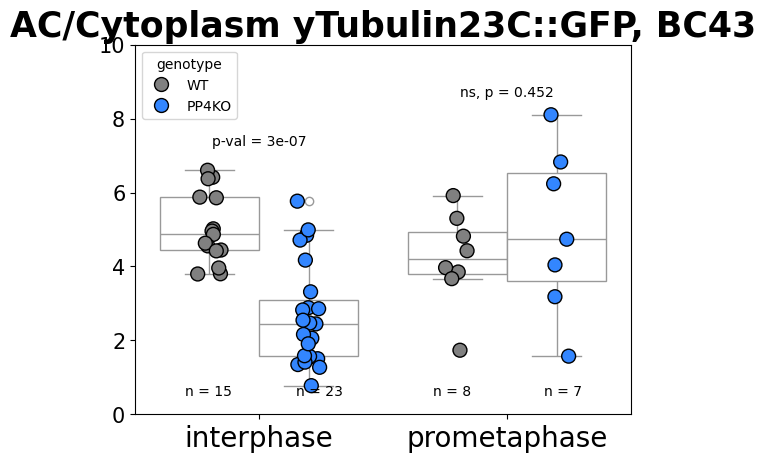

In [8]:
# plotting only 3i data
p = ['grey', '#3386FF']
hue_order = ['WT', 'PP4KO']
order = ['interphase', 'prometaphase']
y_value = 'AC/Cyto GFP'
point_size = 10

plot_title = 'AC/Cytoplasm yTubulin23C::GFP, BC43'


sns.stripplot(x = 'phase', y = y_value, data = data[data['microscope']=='BC43'], hue = 'genotype', 
             hue_order = hue_order, order = order,
             palette = p, size = point_size, edgecolor = 'k', linewidth = 1,
             dodge = True)

sns.boxplot(x = 'phase', y = y_value, data = data[data['microscope']=='BC43'], hue = 'genotype', 
             hue_order = hue_order, order = order,
             palette = ['w','w'], dodge = True, legend = False)

# adding stats
for i in range(0, len(order)):
    phase = order[i]
    x_pos = i

    param1 = data[(data['genotype']=='WT') & (data['phase'] == phase)]
    param1 = param1[param1['microscope']=='BC43'][y_value]
    #param1
    param2 = data[(data['genotype']=='PP4KO') & (data['phase'] == phase)]
    param2 = param2[param2['microscope']=='BC43'][y_value]
    #param2
    p_value = independent_ttest(param1, param2, 0.05)[3]
    
    if p_value < 0.001:
        p_annot = f"p-val = {np.round(p_value, decimals = 8)}"
        plt.annotate(p_annot, xy = (x_pos, param2.max()+1.5), ha = 'center')
        plt.annotate(f"n = {len(param1)}", xy = (x_pos-0.3, 0.5))
        plt.annotate(f"n = {len(param2)}", xy = (x_pos+0.15, 0.5))
    elif p_value < 0.01:
        p_annot = '**'
        plt.annotate(p_annot, xy = (x_pos, param2.max()+0.5), ha = 'center', size = 20)
        plt.annotate(f"n = {len(param1)}", xy = (x_pos-0.3, 0.5))
        plt.annotate(f"n = {len(param2)}", xy = (x_pos+0.15, 0.5))
    elif p_value < 0.05:
        p_annot = '*'
        plt.annotate(p_annot, xy = (x_pos, param2.max()+0.5), ha = 'center', size = 20)
        plt.annotate(f"n = {len(param1)}", xy = (x_pos-0.3, 0.5))
        plt.annotate(f"n = {len(param2)}", xy = (x_pos+0.15, 0.5))
    elif p_value > 0.05:
        p_annot = f"ns, p = {np.round(p_value, decimals = 3)}"
        plt.annotate(p_annot, xy = (x_pos, param2.max()+0.5), ha = 'center')
        plt.annotate(f"n = {len(param1)}", xy = (x_pos-0.3, 0.5))
        plt.annotate(f"n = {len(param2)}", xy = (x_pos+0.15, 0.5))

plt.xticks(size = 20)
plt.yticks(size = 15)
plt.ylim(0,10)
plt.title(plot_title, fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel('')
plt.title(plot_title, fontsize = 25, fontweight = 'bold')

#os.chdir(figs_dir)

#plt.savefig('yTub23CGFP_new size_BC43.png', dpi = 900, bbox_inches = 'tight')
#plt.savefig('yTub23CGFP_new size_BC43.svg', dpi = 900, bbox_inches = 'tight')
plt.show();


# Stats Table

In [9]:
data.head()

,file name,microscope,genotype,"spot size (X,Y,Z)",phase,raw AC GFP,subtracted AC GFP,AC/Cyto GFP
0,"RCS PP4KO x yTub23CGFP, ChJup female overview_...",BC43,WT,"1,1,2",interphase,156.937,56.937,3.795800
1,"RCS PP4KO x yTub23CGFP, ChJup female overview_...",BC43,WT,"1,1,2",interphase,175.265,75.265,5.017667
2,"RCS PP4KO x yTub23CGFP, ChJup female overview_...",BC43,WT,"1,1,2",interphase,157.013,57.013,3.800867
3,"RCS PP4KO x yTub23CGFP, ChJup female overview_...",BC43,WT,"1,1,2",interphase,196.205,96.205,6.413667
4,"RCS PP4KO x yTub23CGFP, ChJup female overview_...",BC43,WT,"1,1,2",interphase,166.664,66.664,4.444267


In [10]:
stats_table = pd.DataFrame(columns = ['control variable', 'experimental variable', 'phase', 'test', 'y-value',
                                      'control n', 'experimental n',
                                      'control mean', 'experimental mean',
                                     'control stdev', 'experimental stdev',
                                     'test statistic', 'degrees of freedom', 
                                     'critical value', 'p-value'])

pd.set_option('display.float_format', '{:.2E}'.format) # enables scientific notation

stats_table

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value


In [11]:
# test# = [control genotype, experimental genotype, phase, y-value]
t1 = ['WT', 'PP4KO', 'interphase', 'AC/Cyto GFP']
t2 = ['WT', 'PP4KO', 'prometaphase', 'AC/Cyto GFP']

tests = [t1, t2]

In [12]:
for i in range(0, len(tests)):
    stats_table.loc[i, 'control variable'] = tests[i][0]
    stats_table.loc[i, 'experimental variable'] = tests[i][1]
    stats_table.loc[i, 'phase'] = tests[i][2]
    stats_table.loc[i, 'y-value'] = tests[i][3]
    
    param1 = data[(data['genotype']==tests[i][0]) & (data['phase']==tests[i][2])][tests[i][3]].dropna()
    param2 = data[(data['genotype']==tests[i][1]) & (data['phase']==tests[i][2])][tests[i][3]].dropna()

    stats_table.loc[i, 'control n'] = len(param1)
    stats_table.loc[i, 'experimental n'] = len(param2)

    stats_table.loc[i, 'control mean'] = param1.mean()
    stats_table.loc[i, 'experimental mean'] = param2.mean()

    stats_table.loc[i, 'control stdev'] = param1.std()
    stats_table.loc[i, 'experimental stdev'] = param2.std()

    test = independent_ttest(param1, param2, 0.05)
    stats_table.loc[i, 'test statistic'] = test[0]
    stats_table.loc[i, 'degrees of freedom'] = test[1]
    stats_table.loc[i, 'critical value'] = test[2]
    stats_table.loc[i, 'p-value'] = test[3]


    if test[3] < 0.0001:
        sig = "****"
    elif test[3] < 0.001:
        sig = "***"
    elif test[3] < 0.01:
        sig = "**"
    elif test[3] < 0.05:
        sig = "*"
    elif test[3] > 0.05:
        sig = "ns"
    stats_table.loc[i, 'significance'] = sig
    
stats_table['test'] = "Unpaired Student's T-test"
stats_table

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value,significance
0,WT,PP4KO,interphase,Unpaired Student's T-test,AC/Cyto GFP,24,41,4.90E+00,2.82E+00,1.02E+00,1.19E+00,7.45E+00,63,1.67E+00,3.27E-10,****
1,WT,PP4KO,prometaphase,Unpaired Student's T-test,AC/Cyto GFP,16,10,4.03E+00,4.41E+00,1.03E+00,2.07E+00,-5.36E-01,24,1.71E+00,5.97E-01,ns


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene

stats_table = pd.DataFrame(columns = ['control variable', 'experimental variable', 'marker', 'phase', 'test', 'y-value',
                                      'control n', 'experimental n',
                                      'control mean', 'experimental mean',
                                     'control stdev', 'experimental stdev',
                                     'test statistic', 'degrees of freedom', 
                                     'critical value', 'p-value'])

pd.set_option('display.float_format', '{:.2E}'.format) # enables scientific notation


# test# = [control genotype, experimental genotype, phase, y-value]
t1 = ['WT', 'PP4KO', 'interphase', 'AC/Cyto GFP']
t2 = ['WT', 'PP4KO', 'prometaphase', 'AC/Cyto GFP']

tests = [t1, t2]


# Function to determine appropriate test
def is_parametric(data1, data2, alpha=0.05):
    # Check if data is numeric
    continuous = all(isinstance(x, (int, float)) for x in data1) and \
                 all(isinstance(x, (int, float)) for x in data2)
    if not continuous:
        return {'suitable_for_ttest': False, 'suggested_test': "Mann-Whitney U test"}

    # Shapiro-Wilk test for normality
    normality1 = shapiro(data1).pvalue > alpha
    normality2 = shapiro(data2).pvalue > alpha
    normality = normality1 and normality2

    # Levene's test for equal variances
    equal_variance = levene(data1, data2).pvalue > alpha

    # Determine if suitable for t-test
    suitable_for_ttest = normality and equal_variance
    suggested_test = "t-test" if suitable_for_ttest else "Mann-Whitney U test"

    return {'suitable_for_ttest': suitable_for_ttest, 'suggested_test': suggested_test}

# Iterate through tests
for i, test_params in enumerate(tests):
    control_var, experimental_var, phase, y_value = test_params

    # Subset data for the current test
    param1 = data[(data['genotype'] == control_var) & (data['phase'] == phase)][y_value].dropna()
    param2 = data[(data['genotype'] == experimental_var) & (data['phase'] == phase)][y_value].dropna()

    # Populate descriptive stats
    stats_table.loc[i, 'control variable'] = control_var
    stats_table.loc[i, 'experimental variable'] = experimental_var
    stats_table.loc[i, 'marker'] = 'yTub23C::GFP'
    stats_table.loc[i, 'phase'] = phase
    stats_table.loc[i, 'y-value'] = y_value
    stats_table.loc[i, 'control n'] = len(param1)
    stats_table.loc[i, 'experimental n'] = len(param2)
    stats_table.loc[i, 'control mean'] = param1.mean()
    stats_table.loc[i, 'experimental mean'] = param2.mean()
    stats_table.loc[i, 'control stdev'] = param1.std()
    stats_table.loc[i, 'experimental stdev'] = param2.std()

    # Determine appropriate test
    test_result = is_parametric(param1, param2)
    suggested_test = test_result['suggested_test']

    if suggested_test == "t-test":
        t_stat, p_value = ttest_ind(param1, param2)
        stats_table.loc[i, 'test'] = "Unpaired Student's T-test"
        stats_table.loc[i, 'test statistic'] = t_stat
        stats_table.loc[i, 'degrees of freedom'] = len(param1) + len(param2) - 2
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this summary
    else:
        u_stat, p_value = mannwhitneyu(param1, param2, alternative='two-sided')
        stats_table.loc[i, 'test'] = "Mann-Whitney U Test"
        stats_table.loc[i, 'test statistic'] = u_stat
        stats_table.loc[i, 'degrees of freedom'] = "N/A"  # Not applicable for this test
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this test

    # Record p-value in scientific notation
    stats_table.loc[i, 'p-value'] = f"{p_value:.5e}"

    # Add significance stars
    if p_value < 0.0001:
        sig = "****"
    elif p_value < 0.001:
        sig = "***"
    elif p_value < 0.01:
        sig = "**"
    elif p_value < 0.05:
        sig = "*"
    else:
        sig = "ns"
    stats_table.loc[i, 'significance'] = sig

# Display the stats table
stats_table
yTub23C = stats_table
# saves output stats table
#os.chdir(outs_dir)
#stats_table.to_csv('revised_FIG2 yTub23C-GFP stats.csv')
os.chdir(home_dir)

,control variable,experimental variable,marker,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value,significance
0,WT,PP4KO,yTub23C::GFP,interphase,Unpaired Student's T-test,AC/Cyto GFP,24,41,4.90E+00,2.82E+00,1.02E+00,1.19E+00,7.14E+00,63,N/A,1.14259e-09,****
1,WT,PP4KO,yTub23C::GFP,prometaphase,Unpaired Student's T-test,AC/Cyto GFP,16,10,4.03E+00,4.41E+00,1.03E+00,2.07E+00,-6.21E-01,24,N/A,5.40453e-01,ns


# yTub37C plots
- I adjusted the spot dimmensions to overlap as much with the WT distribution of yTub as possible.
- This came to an XY dimmension of 1.83 um, and a Z dimmension of 3.5.
- I took ten cells and added these new spots to interphase yTub37CGFP signal in interphase.
- I placed a spot at the corner of the image to get the scope background values.
    - mean, median and max values all fell around 100.
    - sum of RFP channel, PP4KO: 1.57e4
    - sum of GFP channel, PP4KO: 1.54e4
    - sum of RFP channel, WT: 1.08e4
    - sum of GFP channel, WT: 1.09e4
- I took one representative cell for cytoplasmic signal and applied it to each dataset.
    - WT:
        - mean RFP: 260
        - mean GFP: 154
        - median RFP: 261
        - median GFP: 154
        - max RFP: 310
        - max GFP: 181
        - sum RFP: 4.73e4
        - sum GFP:  2.8e4
    - PP4KO:
        - mean RFP: 287
        - mean GFP: 127
        - median RFP: 289
        - median GFP: 127
        - max RFP: 323
        - max GFP: 151
        - sum RFP: 4.91e4
        - sum GFP:  2.18e4
    - If needed, I will go back and take individual cytoplasmic backgrounds.

In [14]:
# reading in raw data and plotting
os.chdir(home_dir)
data = pd.read_excel('Fig2 data.xlsx', sheet_name = 'Fig 2F')
data.head()

,file,genotype,phase,RFP AC mean,RFP AC median,RFP AC max,RFP AC sum,Unnamed: 7,RFP AC mean adj.,RFP AC median adj.,RFP AC max adj.,RFP AC sum adj.,Unnamed: 12,GFP AC mean,GFP AC median,GFP AC max,GFP AC sum,Unnamed: 17,GFP AC mean adj.
0,2021-08-17_yTubGFP-ChJup_2_Capture 2 - Position 1,WT,interphase,8.05E+02,7.56E+02,1.18E+03,1.48E+05,NaN,4.41E+00,4.08E+00,5.14E+00,3.76E+00,NaN,2.65E+02,2.47E+02,4.53E+02,4.87E+04,NaN,3.05E+00
1,2021-08-17_yTubGFP-ChJup_2_Capture 2 - Position 1,WT,interphase,6.03E+02,6.15E+02,9.46E+02,1.08E+05,NaN,3.14E+00,3.20E+00,4.03E+00,2.68E+00,NaN,2.11E+02,2.03E+02,3.41E+02,3.80E+04,NaN,2.06E+00
2,2021-08-17_yTubGFP-ChJup_2_Capture 2 - Position 1,WT,interphase,4.59E+02,4.51E+02,5.94E+02,8.39E+04,NaN,2.24E+00,2.18E+00,2.35E+00,2.00E+00,NaN,2.01E+02,1.81E+02,4.20E+02,3.68E+04,NaN,1.87E+00
3,2021-08-17_yTubGFP-ChJup_2_Capture 2 - Position 1,WT,interphase,3.86E+02,3.96E+02,5.01E+02,6.87E+04,NaN,1.79E+00,1.84E+00,1.91E+00,1.59E+00,NaN,1.59E+02,1.54E+02,2.04E+02,2.83E+04,NaN,1.09E+00
4,2021-08-17_yTubGFP-ChJup_2_Capture 2 - Position 1,WT,interphase,4.11E+02,4.06E+02,5.40E+02,7.49E+04,NaN,1.95E+00,1.90E+00,2.10E+00,1.76E+00,NaN,2.14E+02,2.06E+02,3.39E+02,3.90E+04,NaN,2.12E+00


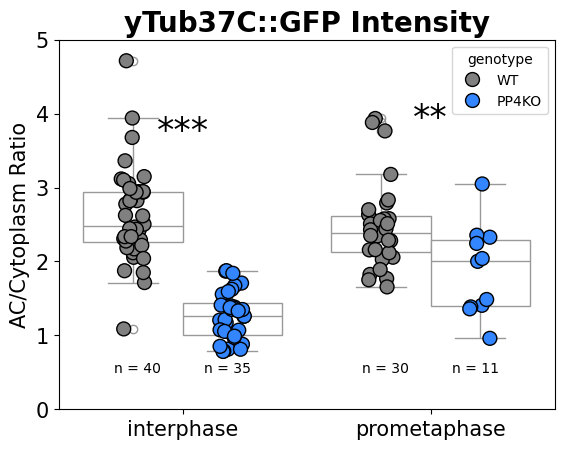

In [15]:
sns.stripplot(x = 'phase', y = 'GFP AC mean adj.', data = data, hue = 'genotype',
             order = ['interphase', 'prometaphase'], palette = p, dodge = True,
             legend = True, edgecolor = 'k', size = 10, linewidth = 1)

sns.boxplot(x = 'phase', y = 'GFP AC mean adj.', data = data, hue = 'genotype',
             order = ['interphase', 'prometaphase'], dodge = True, legend = False,
           palette = ['w', 'w'])
# t test
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['GFP AC mean adj.'].dropna()
param2 = data[(data['genotype']=='PP4KO') & (data['phase']=='interphase')]['GFP AC mean adj.'].dropna()
pv = independent_ttest(param1, param2, 0.05)[3]

plt.annotate(f"n = {len(param1)}", xy = (-0.18,0.5), ha = 'center')
plt.annotate(f"n = {len(param2)}", xy = (0.18,0.5), ha = 'center')

if pv < 0.001:
    plt.annotate('***', xy = (0, param2.max()+1.75), ha = 'center', fontsize = 25)
elif pv < 0.01:
    plt.annotate('**', xy = (0, param2.max()+1.75), ha = 'center', fontsize = 25)
elif pv < 0.05:
    plt.annotate('*', xy = (0, param2.max()+1.75), ha = 'center', fontsize = 25)
elif pv > 0.05:
    plt.annotate(f'ns, pval = {np.round(pv, decimals = 3)}', xy = (0, param2.max()+1.5), ha = 'center')

# t test
param1 = data[(data['genotype']=='WT') & (data['phase']=='prometaphase')]['GFP AC mean adj.'].dropna()
param2 = data[(data['genotype']=='PP4KO') & (data['phase']=='prometaphase')]['GFP AC mean adj.'].dropna()
pv = independent_ttest(param1, param2, 0.05)[3]

plt.annotate(f"n = {len(param1)}", xy = (0.82,0.5), ha = 'center')
plt.annotate(f"n = {len(param2)}", xy = (1.18,0.5), ha = 'center')

if pv < 0.001:
    plt.annotate('***', xy = (1, param2.max()+0.75), ha = 'center', fontsize = 25)
elif pv < 0.01:
    plt.annotate('**', xy = (1, param2.max()+0.75), ha = 'center', fontsize = 25)
elif pv < 0.05:
    plt.annotate('*', xy = (1, param2.max()+0.75), ha = 'center', fontsize = 25)
elif pv > 0.05:
    plt.annotate(f'ns, pval = {np.round(pv, decimals = 3)}', xy = (1, param2.max()+0.5), ha = 'center')

plt.ylim(0,5)
plt.ylabel('AC/Cytoplasm Ratio', fontsize = 15)
plt.xlabel('', fontsize = 15)
plt.title('yTub37C::GFP Intensity', fontsize = 20, fontweight = 'bold')
plt.xticks(size = 15)
plt.yticks(size = 15)

#os.chdir(figs_dir)

#plt.savefig('adjusted yTub37CGFP.svg', bbox_inches = 'tight', dpi = 600)
#plt.savefig('adjusted yTub37CGFP.png', bbox_inches = 'tight', dpi = 600)
plt.show();

# yTub37C stats

In [16]:
stats_table = pd.DataFrame(columns = ['control variable', 'experimental variable', 'phase', 'test', 'y-value',
                                      'control n', 'experimental n',
                                      'control mean', 'experimental mean',
                                     'control stdev', 'experimental stdev',
                                     'test statistic', 'degrees of freedom', 
                                     'critical value', 'p-value'])

pd.set_option('display.float_format', '{:.2E}'.format) # enables scientific notation

stats_table

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value


In [17]:
# test# = [control genotype, experimental genotype, phase, y-value]
t1 = ['WT', 'PP4KO', 'interphase', 'GFP AC mean adj.']
t2 = ['WT', 'PP4KO', 'prometaphase', 'GFP AC mean adj.']

tests = [t1, t2]

In [18]:
for i in range(0, len(tests)):
    stats_table.loc[i, 'control variable'] = tests[i][0]
    stats_table.loc[i, 'experimental variable'] = tests[i][1]
    stats_table.loc[i, 'phase'] = tests[i][2]
    stats_table.loc[i, 'y-value'] = tests[i][3]
    
    param1 = data[(data['genotype']==tests[i][0]) & (data['phase']==tests[i][2])][tests[i][3]].dropna()
    param2 = data[(data['genotype']==tests[i][1]) & (data['phase']==tests[i][2])][tests[i][3]].dropna()

    stats_table.loc[i, 'control n'] = len(param1)
    stats_table.loc[i, 'experimental n'] = len(param2)

    stats_table.loc[i, 'control mean'] = param1.mean()
    stats_table.loc[i, 'experimental mean'] = param2.mean()

    stats_table.loc[i, 'control stdev'] = param1.std()
    stats_table.loc[i, 'experimental stdev'] = param2.std()

    test = independent_ttest(param1, param2, 0.05)
    stats_table.loc[i, 'test statistic'] = test[0]
    stats_table.loc[i, 'degrees of freedom'] = test[1]
    stats_table.loc[i, 'critical value'] = test[2]
    stats_table.loc[i, 'p-value'] = test[3]


    if test[3] < 0.0001:
        sig = "****"
    elif test[3] < 0.001:
        sig = "***"
    elif test[3] < 0.01:
        sig = "**"
    elif test[3] < 0.05:
        sig = "*"
    elif test[3] > 0.05:
        sig = "ns"
    stats_table.loc[i, 'significance'] = sig
    
stats_table['test'] = "Unpaired Student's T-test"
stats_table

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value,significance
0,WT,PP4KO,interphase,Unpaired Student's T-test,GFP AC mean adj.,40,35,2.62E+00,1.26E+00,6.38E-01,3.25E-01,1.18E+01,73,1.67E+00,0.00E+00,****
1,WT,PP4KO,prometaphase,Unpaired Student's T-test,GFP AC mean adj.,30,11,2.47E+00,1.87E+00,5.86E-01,6.09E-01,2.81E+00,39,1.68E+00,7.65E-03,**


In [19]:
# saves output stats table
#os.chdir(outs_dir)
#stats_table.to_csv('FIG2 yTub37C-GFP stats.csv')
os.chdir(home_dir)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene

stats_table = pd.DataFrame(columns = ['control variable', 'experimental variable', 'marker', 'phase', 'test', 'y-value',
                                      'control n', 'experimental n',
                                      'control mean', 'experimental mean',
                                     'control stdev', 'experimental stdev',
                                     'test statistic', 'degrees of freedom', 
                                     'critical value', 'p-value'])

pd.set_option('display.float_format', '{:.2E}'.format) # enables scientific notation


# test# = [control genotype, experimental genotype, phase, y-value]
t1 = ['WT', 'PP4KO', 'interphase', 'GFP AC mean adj.']
t2 = ['WT', 'PP4KO', 'prometaphase', 'GFP AC mean adj.']

tests = [t1, t2]


# Function to determine appropriate test
def is_parametric(data1, data2, alpha=0.05):
    # Check if data is numeric
    continuous = all(isinstance(x, (int, float)) for x in data1) and \
                 all(isinstance(x, (int, float)) for x in data2)
    if not continuous:
        return {'suitable_for_ttest': False, 'suggested_test': "Mann-Whitney U test"}

    # Shapiro-Wilk test for normality
    normality1 = shapiro(data1).pvalue > alpha
    normality2 = shapiro(data2).pvalue > alpha
    normality = normality1 and normality2

    # Levene's test for equal variances
    equal_variance = levene(data1, data2).pvalue > alpha

    # Determine if suitable for t-test
    suitable_for_ttest = normality and equal_variance
    suggested_test = "t-test" if suitable_for_ttest else "Mann-Whitney U test"

    return {'suitable_for_ttest': suitable_for_ttest, 'suggested_test': suggested_test}

# Iterate through tests
for i, test_params in enumerate(tests):
    control_var, experimental_var, phase, y_value = test_params

    # Subset data for the current test
    param1 = data[(data['genotype'] == control_var) & (data['phase'] == phase)][y_value].dropna()
    param2 = data[(data['genotype'] == experimental_var) & (data['phase'] == phase)][y_value].dropna()

    # Populate descriptive stats
    stats_table.loc[i, 'control variable'] = control_var
    stats_table.loc[i, 'experimental variable'] = experimental_var
    stats_table.loc[i, 'phase'] = phase
    stats_table.loc[i, 'marker'] = 'yTub37C::GFP'
    stats_table.loc[i, 'y-value'] = y_value
    stats_table.loc[i, 'control n'] = len(param1)
    stats_table.loc[i, 'experimental n'] = len(param2)
    stats_table.loc[i, 'control mean'] = param1.mean()
    stats_table.loc[i, 'experimental mean'] = param2.mean()
    stats_table.loc[i, 'control stdev'] = param1.std()
    stats_table.loc[i, 'experimental stdev'] = param2.std()

    # Determine appropriate test
    test_result = is_parametric(param1, param2)
    suggested_test = test_result['suggested_test']

    if suggested_test == "t-test":
        t_stat, p_value = ttest_ind(param1, param2)
        stats_table.loc[i, 'test'] = "Unpaired Student's T-test"
        stats_table.loc[i, 'test statistic'] = t_stat
        stats_table.loc[i, 'degrees of freedom'] = len(param1) + len(param2) - 2
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this summary
    else:
        u_stat, p_value = mannwhitneyu(param1, param2, alternative='two-sided')
        stats_table.loc[i, 'test'] = "Mann-Whitney U Test"
        stats_table.loc[i, 'test statistic'] = u_stat
        stats_table.loc[i, 'degrees of freedom'] = "N/A"  # Not applicable for this test
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this test

    # Record p-value in scientific notation
    stats_table.loc[i, 'p-value'] = f"{p_value:.5e}"

    # Add significance stars
    if p_value < 0.0001:
        sig = "****"
    elif p_value < 0.001:
        sig = "***"
    elif p_value < 0.01:
        sig = "**"
    elif p_value < 0.05:
        sig = "*"
    else:
        sig = "ns"
    stats_table.loc[i, 'significance'] = sig

# Display the stats table
stats_table

yTub37C = stats_table

# saves output stats table
#os.chdir(outs_dir)
#stats_table.to_csv('revised_FIG2 yTub37C-GFP stats.csv')
os.chdir(home_dir)

,control variable,experimental variable,marker,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value,significance
0,WT,PP4KO,yTub37C::GFP,interphase,Mann-Whitney U Test,GFP AC mean adj.,40,35,2.62E+00,1.26E+00,6.38E-01,3.25E-01,1.37E+03,N/A,N/A,9.94595e-13,****
1,WT,PP4KO,yTub37C::GFP,prometaphase,Mann-Whitney U Test,GFP AC mean adj.,30,11,2.47E+00,1.87E+00,5.86E-01,6.09E-01,2.54E+02,N/A,N/A,9.21245e-03,**


In [21]:
# combine stats tables
stats_table = pd.concat([yTub23C, yTub37C])
stats_table
#os.chdir(outs_dir)
#stats_table.to_csv('FIG2 yTub stats.csv')

,control variable,experimental variable,marker,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value,significance
0,WT,PP4KO,yTub23C::GFP,interphase,Unpaired Student's T-test,AC/Cyto GFP,24,41,4.90E+00,2.82E+00,1.02E+00,1.19E+00,7.14E+00,63,N/A,1.14259e-09,****
1,WT,PP4KO,yTub23C::GFP,prometaphase,Unpaired Student's T-test,AC/Cyto GFP,16,10,4.03E+00,4.41E+00,1.03E+00,2.07E+00,-6.21E-01,24,N/A,5.40453e-01,ns
0,WT,PP4KO,yTub37C::GFP,interphase,Mann-Whitney U Test,GFP AC mean adj.,40,35,2.62E+00,1.26E+00,6.38E-01,3.25E-01,1.37E+03,N/A,N/A,9.94595e-13,****
1,WT,PP4KO,yTub37C::GFP,prometaphase,Mann-Whitney U Test,GFP AC mean adj.,30,11,2.47E+00,1.87E+00,5.86E-01,6.09E-01,2.54E+02,N/A,N/A,9.21245e-03,**
